In [1]:
# copy code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

for current_folders, sub_folders, file_names in os.walk('D:\\RnD\\Nets\\RNN\\data'):
    for file_name in file_names:
        print(os.path.join(current_folders, file_name))


D:\RnD\Nets\RNN\data\Google_Stock_Price_Test.csv
D:\RnD\Nets\RNN\data\Google_Stock_Price_Train.csv


In [2]:
data_train = pd.read_csv('D:\\RnD\\Nets\\RNN\\data\\Google_Stock_Price_Train.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
train = data_train.loc[:,["Open"]].values
print(train)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [5]:
x_train = []
y_train = []
timesteps = 5

for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(y_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
[0.0643277  0.0585423  0.06568569 ... 0.95725128 0.93796041 0.93688146]


In [19]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

regressor = Sequential()

regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))
regressor.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))
regressor.add(SimpleRNN(units = 100))
regressor.add(Dense(units=1))

regressor.compile(optimizer= "adam", loss = "mean_squared_error")
regressor.fit(x_train, y_train, epochs = 100, batch_size = 1)

Epoch 1/100


C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0074
Epoch 2/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0015
Epoch 3/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011
Epoch 4/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0018
Epoch 5/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.5292e-04
Epoch 6/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.1723e-04
Epoch 7/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6393e-04
Epoch 8/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.2126e-04
Epoch 9/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.4349e-04
Epoch 10/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8941e-04
Epoch 11/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9444e-04
Epoch 12/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9946e-04
Epoch 13/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.7350e-04
Epoch 14/100
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss

In [22]:
data_test = pd.read_csv("D:\\RnD\\Nets\\RNN\\data\\Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [23]:
real_stock_price = data_test.loc[:, ["Open"]].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [24]:
data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.95204256],
       [0.95163331],
       [0.95725128],
       [0.93796041],
       [0.93688146],
       [0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


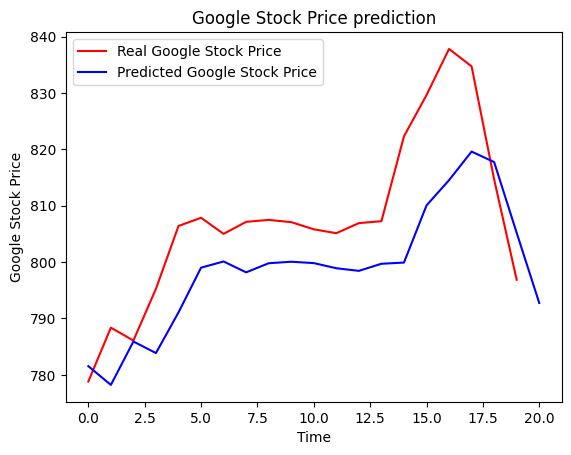

In [25]:
x_test = []
for i in range(timesteps, 70):
    if len(inputs[i-timesteps:i, 0]) == timesteps:
        x_test.append(inputs[i-timesteps:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicte_stock_price = regressor.predict(x_test)
predicte_stock_price = scaler.inverse_transform(predicte_stock_price)

# visualising the results
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicte_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()